**Task 3: Heart Disease Prediction**



In [73]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Cleaning the dataset and performing Exploratory Data Analysis (EDA) to understand trends**

In [76]:
#Loading The Dataset

data=pd.read_csv("/content/heart_disease_uci.csv")

data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [77]:
#Display First 5 Rows
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [78]:
#Display Last 5 Rows
data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [80]:
#Getting Info about data types in dataset and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


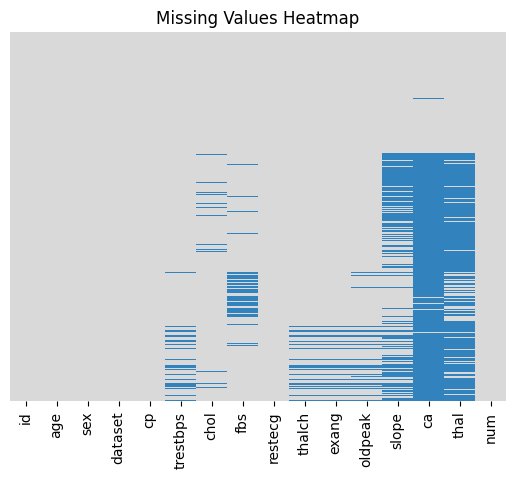

In [81]:
#Displaying The Missing Values in Heatmap Graph
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title("Missing Values Heatmap")
plt.show()

In [82]:
#Removing The Missing Values
data.dropna(inplace=True)

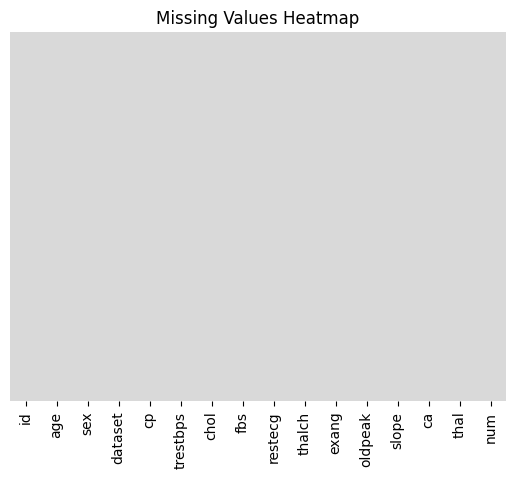

In [83]:
#Displaying Again After Removing Missing Values
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title("Missing Values Heatmap")
plt.show()

In [84]:
#Dropping Unnecessary Features

data.drop(['id','dataset','slope','ca','thal'],axis=1,inplace=True)

In [85]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [86]:
data.shape

(299, 11)

In [88]:
#Numeric Summary
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,131.715719,246.785953,149.327759,1.058528,0.946488
std,9.030264,17.747751,52.532582,23.121062,1.162769,1.230409
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000
50%,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.500000,165.500000,1.600000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


Converting the num feature values to binary values for binary classification,
if x>0 means person has some level of heart disese
else person has no heart disease if x==0.



```
0 refers to no heart disease(0=no disease)
1 refers to heart disease((1,2,4= 1) has heart disease)
```



In [89]:
# Convert target: 0 = No disease, 1 = Disease

data['target'] =data['num'].apply(lambda x: 1 if x > 0 else 0)

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,2,1
300,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,3,1
301,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,1,1
508,47,Male,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,1,1


Now droping the num variable after converting its value to binary, and stored in target variable.

In [90]:
data.drop('num', axis=1, inplace=True)

In [116]:
# Convert sex values to float values

data['gender'] =data['sex'].apply(lambda x: 1 if x=="Female" else 0)

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target,gender
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,1,0
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,0
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,Male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,1,0
300,57,Male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,1,0
301,57,Female,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,1,1
508,47,Male,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,1,0


In [117]:
data.drop('sex', axis=1, inplace=True)

In [ ]:
data.drop(["cp","fbs","restecg","exang"], axis=1, inplace=True)

In [120]:
data

,age,trestbps,chol,thalch,oldpeak,target,gender
0,63,145.0,233.0,150.0,2.3,0,0
1,67,160.0,286.0,108.0,1.5,1,0
2,67,120.0,229.0,129.0,2.6,1,0
3,37,130.0,250.0,187.0,3.5,0,0
4,41,130.0,204.0,172.0,1.4,0,1
...,...,...,...,...,...,...,...
299,68,144.0,193.0,141.0,3.4,1,0
300,57,130.0,131.0,115.0,1.2,1,0
301,57,130.0,236.0,174.0,0.0,1,1
508,47,150.0,226.0,98.0,1.5,1,0


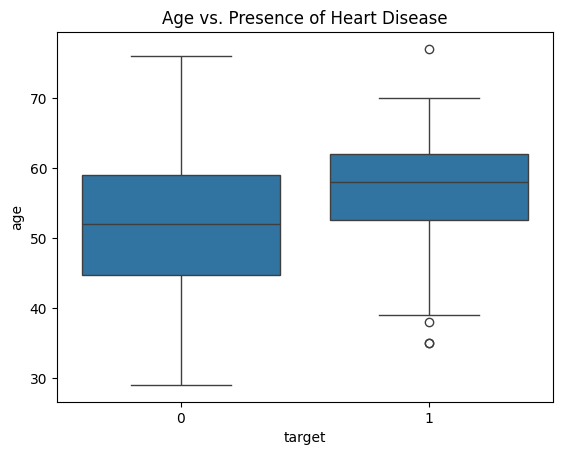

In [121]:
sns.boxplot(x="target", y="age", data=data)
plt.title("Age vs. Presence of Heart Disease")
plt.show()

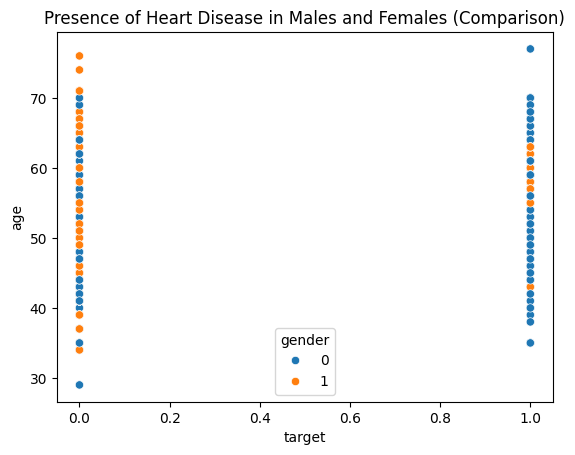

In [123]:
sns.scatterplot(x='target', y='age', hue='gender', data=data)
plt.title("Presence of Heart Disease in Males and Females (Comparison)")
plt.show()

After comparing males(0) and females(1), this graph shows that most females are healthy, while most males are diagnosed with heart disease. Additionally, there are no heart disease patients under the age of 35 in either gender.

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [124]:
#Splits data used in models
x=data.drop("target", axis=1) #grabs everything except "target"

#Target Variable
y=data['target'] #target varaible we're trying to predict

**Getting Model Ready (Train A Classification Model)**

In [125]:
#use x and y variables to split training data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=42)

In [126]:
x_train.shape
x_train

,age,trestbps,chol,thalch,oldpeak,gender
6,62,140.0,268.0,160.0,3.6,1
185,63,140.0,195.0,179.0,0.0,1
187,66,160.0,246.0,120.0,0.0,0
147,41,112.0,250.0,179.0,0.0,0
30,69,140.0,239.0,151.0,1.8,1
...,...,...,...,...,...,...
190,50,129.0,196.0,163.0,0.0,0
71,67,125.0,254.0,163.0,0.2,0
107,57,128.0,229.0,150.0,0.4,0
274,59,134.0,204.0,162.0,0.8,0


In [129]:
y_train.shape
y_train

,target
6,1
185,0
187,1
147,0
30,0
...,...
190,0
71,1
107,1
274,1


In [130]:
x_test.shape
x_test

,age,trestbps,chol,thalch,oldpeak,gender
285,58,114.0,318.0,140.0,4.4,0
269,42,130.0,180.0,150.0,0.0,0
165,57,132.0,207.0,168.0,0.0,0
9,53,140.0,203.0,155.0,3.1,0
77,51,140.0,308.0,142.0,1.5,1
282,55,128.0,205.0,130.0,2.0,1
94,63,135.0,252.0,172.0,0.0,1
110,61,145.0,307.0,146.0,1.0,1
5,56,120.0,236.0,178.0,0.8,0
175,57,152.0,274.0,88.0,1.2,0


In [131]:
y_test.shape
y_test

,target
285,1
269,0
165,0
9,1
77,0
282,1
94,0
110,1
5,0
175,1


**LOGISTIC REGRESSION**

In [133]:
from sklearn.linear_model import LogisticRegression

#Create an instance of model
log_reg= LogisticRegression()

#Passing Training Data To The Model
log_reg.fit(x_train, y_train)


LogisticRegression()

In [135]:
#prediction from the model

y_pred=log_reg.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1]


In [145]:
# Combine actual and predicted values
results=np.column_stack((y_test,y_pred))

# Printing the results
print("Actual Values | Predicted Values")
print("--------------------------------")

for actual, predicted in results:
  print(f'{actual:14.2f}|{predicted:12.2f}')

Actual Values | Predicted Values
--------------------------------
          1.00|        1.00
          0.00|        0.00
          0.00|        0.00
          1.00|        1.00
          0.00|        0.00
          1.00|        0.00
          0.00|        0.00
          1.00|        0.00
          0.00|        0.00
          1.00|        1.00
          0.00|        0.00
          0.00|        0.00
          0.00|        0.00
          1.00|        1.00
          1.00|        0.00
          1.00|        0.00
          0.00|        0.00
          1.00|        1.00
          0.00|        0.00
          1.00|        1.00
          1.00|        1.00
          0.00|        0.00
          0.00|        1.00
          0.00|        1.00
          0.00|        0.00
          0.00|        0.00
          1.00|        0.00
          0.00|        0.00
          0.00|        0.00
          0.00|        0.00
          0.00|        1.00
          0.00|        0.00
          0.00|        0.00
          

**MODEL EVALUATION:**

Using Accuracy, ROC-AUC and Confusion Matrix

**ACCURACY:**

In [163]:
from sklearn.metrics import accuracy_score

accuracy=round(accuracy_score(y_test, y_pred)*100,2)
print("Accuracy:", accuracy,"%")

Accuracy: 76.67 %


**ROC-AUC**

In [162]:
from sklearn.metrics import roc_auc_score

roc=round(roc_auc_score(y_test, y_pred)*100,2)
print("ROC AUC Score:", roc,"%")

ROC AUC Score: 74.29 %


**CONFUSION MATRIX:**

In [165]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Confusion Matrix: [[31  4]
 [10 15]]


TN=31

---


FP=4

---


FN=10

---


TP=15